In [1]:
import IPython

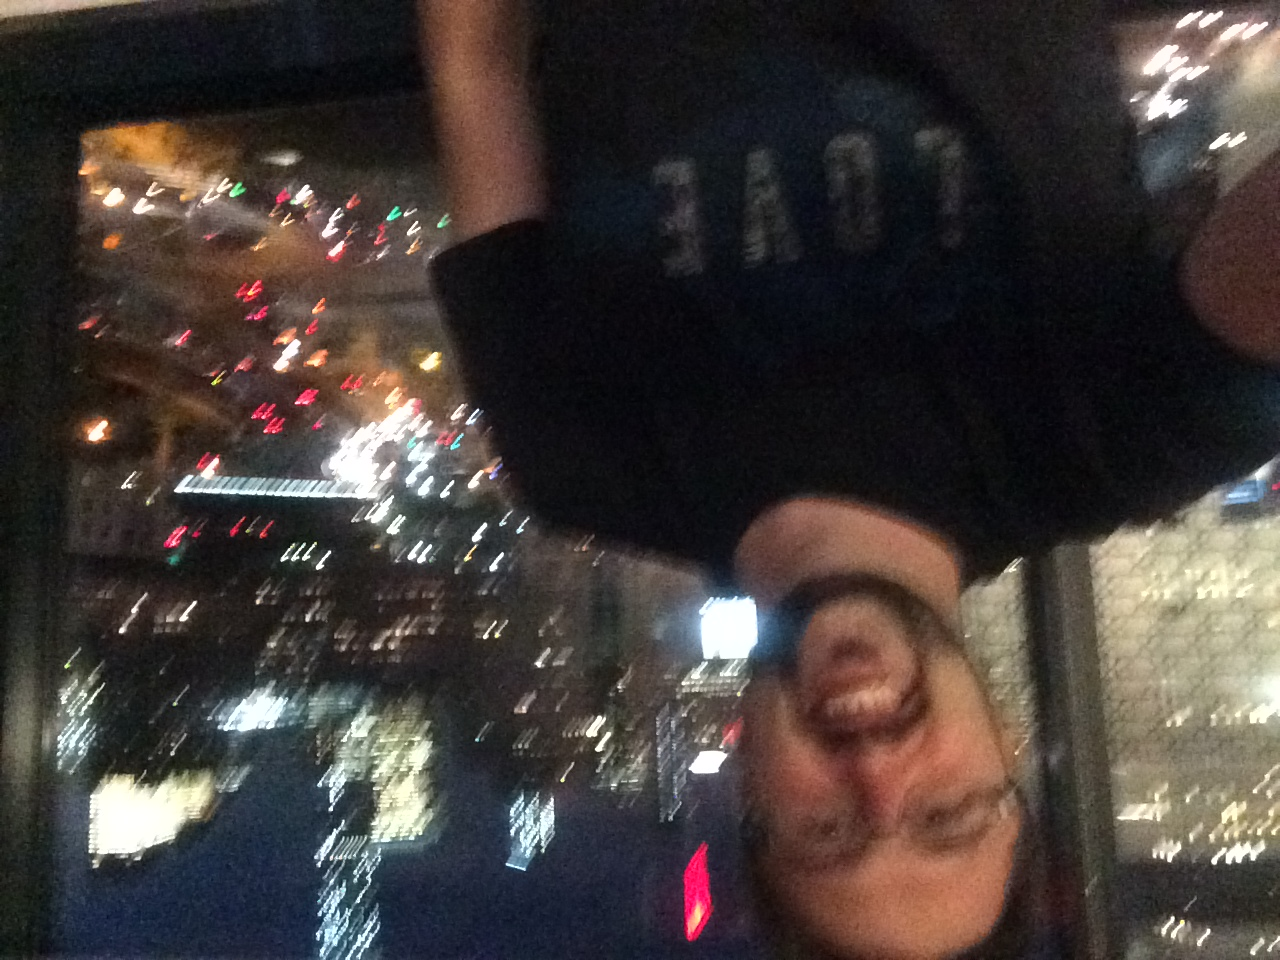

In [8]:
IPython.display.Image("IMG_1354.jpg", width=100)

In [249]:
import pathlib
import imghdr

class HashPath(pathlib.PosixPath):
    hashing_algorithm = 'sha1'
    
    '''This would have been based on Path, but it was a bit of a yak shave
    to make that more generic, and involves either a monkey patch or changing things upstream'''
    def __init__(self, *pathsegments, hashing_algorithm='sha1'):
        super().__init__()
        # Set the hashing algorithm for derivative paths
        self.hashing_algorithm = hashing_algorithm
        
    @property
    def hash(self):
        '''Gets the hash of the file contents on the first run and caches that
        value. Every occurence after returns the previous hash.'''
        h = getattr(self, '_hash', None)
        if h is None:
            hasher = hashlib.new(self.hashing_algorithm)
            with self.open('rb') as f: 
                for chunk in iter(lambda: f.read(8192), b''): 
                    hasher.update(chunk)
            h = hasher.digest()
            self._hash = h
        
        return h
    
    def _repr_html_(self):
        if not self.exists() or not self.is_file():
            return "<pre>{}</pre>".format(repr(self))
        if imghdr.what(self.name) is not None: 
            return "<img src='{}' width=50 />".format(self.name)
    
hp = HashPath("./1405031982570.jpg")

In [250]:
hp

HashPath('1405031982570.jpg')

In [251]:
hp = HashPath("./1405031982570.jpg")
%time hp.hash
%time hp.hash

CPU times: user 519 µs, sys: 377 µs, total: 896 µs
Wall time: 545 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


b'H\xd0\x1a\xe5\xae\x94\x10G\xe5\xfd4\xb7\xd7|\xb3\x1a\x1a\x88\xb0\x9d'

In [252]:
p = HashPath('.')
p.absolute()

HashPath('/Users/kyle6475/Pictures')

In [253]:
next(p.glob("*.JPG"))

HashPath('IMG_0010.JPG')

In [254]:
def group_dupes(path='.', glob='*.JPG'):
    '''Get duplicates from a path'''
    hash_path = HashPath(path)
    hash_groups = collections.defaultdict(list)
    
    for f in hash_path.glob(glob):
        hash_groups[f.hash].append(f)
        
    dupes = []
    for hash, hash_group in hash_groups.items():
        if len(hash_group) >= 2:
            dupes.append(hash_group)
    return dupes

In [255]:
def get_dupes(path='.', glob='*.JPG'):
    '''Get duplicates from a folder, returns only repeated, can directly be deleted.
    Written as an alternate, won't be using here.'''
    hash_path = HashPath(path)
    
    s = set()
    
    def is_duplicate_hash(file_hash):
        if file_hash in s:
            return True
        s.add(file_hash)
        return False
    
    dupes = [f for f in hash_path.glob(glob) if is_duplicate_hash(f.hash)]
    
    return dupes

In [256]:
dupes = group_dupes()

In [257]:
dupes[0]

[HashPath('IMG_0715 1.JPG'), HashPath('IMG_0715.JPG')]

In [266]:
for group in dupes[:20]:
    IPython.display.display(group[0])

HashPath('IMG_0715 1.JPG')

HashPath('IMG_0716 1.JPG')

HashPath('IMG_0884 1.JPG')

HashPath('IMG_1275 1.JPG')

HashPath('IMG_1306 1.JPG')

HashPath('IMG_1047 1.JPG')

HashPath('IMG_1297 1.JPG')

HashPath('IMG_1245 1.JPG')

HashPath('IMG_0730 1.JPG')

HashPath('IMG_0968 1.JPG')

HashPath('IMG_0878 1.JPG')

HashPath('IMG_1296 1.JPG')

HashPath('IMG_1293 1.JPG')

HashPath('IMG_1194 1.JPG')

HashPath('IMG_0757 1.JPG')

HashPath('IMG_1033 1.JPG')

HashPath('IMG_0958 1.JPG')

HashPath('IMG_0772 1.JPG')

HashPath('IMG_1196 1.JPG')

HashPath('IMG_0913 1.JPG')

In [284]:
def clean_dupes(dupes):
    for group in dupes:
        # Keep the smallest name
        smallest_name_length = min(map(lambda x: len(x.name), group))
        to_cull = filter(lambda x: len(x.name) > smallest_name_length, group)
        for fi in to_cull:
            try:
                fi.unlink()
            except FileNotFoundError:
                pass

In [285]:
# Bam! gone.
clean_dupes(dupes)

In [286]:
dupes = group_dupes()

In [287]:
dupes

[[HashPath('IMG_0710 1.JPG'), HashPath('IMG_0710 2.JPG')],
 [HashPath('IMG_0709 1.JPG'), HashPath('IMG_0709 2.JPG')],
 [HashPath('IMG_1034 1.JPG'), HashPath('IMG_1034 2.JPG')]]

In [288]:
london_dupes = group_dupes("/Users/kyle6475/Dropbox/Photos/London/")

In [289]:
london_dupes

[[HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1392 1.JPG'),
  HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1392.JPG')],
 [HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1391 1.JPG'),
  HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1391.JPG')],
 [HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1394 1.JPG'),
  HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1394.JPG')],
 [HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1368 1.JPG'),
  HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1368.JPG')],
 [HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1514 1.JPG'),
  HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1514.JPG')],
 [HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1453 1.JPG'),
  HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1453.JPG')],
 [HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1546 1.JPG'),
  HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1546.JPG')],
 [HashPath('/Users/kyle6475/Dropbox/Photos/London/IMG_1

In [290]:
clean_dupes(london_dupes)

In [291]:
london_dupes = group_dupes("/Users/kyle6475/Dropbox/Photos/London/")
london_dupes

[]